<a href="https://colab.research.google.com/github/HeoYun36/colab-study/blob/main/03_2_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과소적합을 해결하기 위해서 특성을 늘려서 다중 회귀를 구현한다.

In [1]:
# CSV 파일을 읽어서 데이터프레임으로 만든다음 넘파이 배열로 바꾸는 코드
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 타깃데이터
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]
    )

In [3]:
# 훈련 세트와 테스트 세트로 나누는 과정
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [4]:
# 사이킷런의 변환기: 특성을 만들거나 전처리하기 위한 클래스
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]]) # fit 메서드는 새롭게 만들 특성 조합을 찾는다
print(poly.transform([[2, 3]])) # transform은 실제로 데이터를 변환시킨다.

[[1. 2. 3. 4. 6. 9.]]


In [5]:
# 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에 굳이 1인 특성을 만들 필요가 없다.
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
# 원래 훈련 세트에 적용해서 크기 출력
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [7]:
# 9개의 특성이 어떤 조합으로 이루어졌는지 확인하는 방법
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
# 테스트 세트도 변환
test_poly = poly.transform(test_input)

In [9]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 훈련 세트에 대한 점수 확인

0.9903183436982125


In [10]:
# 테스트 세트에 대한 점수
print(lr.score(test_poly, test_target)) # 과소 적합 문제가 더이상 나타나지 않는다는 것을 볼 수 있다.

0.9714559911594111


In [11]:
# 특성을 더욱 추가해보자
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [12]:
# 이러한 데이터를 이용해 모델을 훈련해보자
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [13]:
print(lr.score(test_poly, test_target))

-144.40579436844948


위에서 특성을 과도하게 늘려서 훈련세트에 대해서는 점수가 좋지만 테스트 세트에 대해서는 점수가 음수가 나타난다. 과대적합이 일어났는데 이를 해결해보자

In [14]:
# 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것
# 선형 회귀 모델에서는 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.
# 그 전에 특성의 스케일이 정규화해야한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [15]:
# 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(Lasso)라고 부른다.
# 릿지는 계수를 제곱한 값을 기준으로 규제를 적용한다.
# 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [16]:
print(ridge.score(test_scaled, test_target))
# 모델 객체를 만들 때 alpha 매개변수를 통해 규제의 강도를 조절할 수 있다. 이와 같이 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 한다.

0.9790693977615387


In [17]:
# 적절한 alpha 값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 만든다
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련한다
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장한다.
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


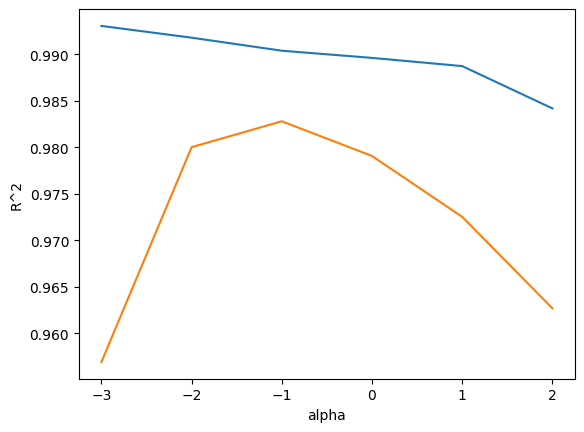

In [18]:
# 그래프로 그려서 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 그래프의 왼쪽을 보면 훈련 세트에는 잘 맞고 테스트 세트에는 잘 맞지 않는 과대적합의 모습을 보인다.
# 반대로 오른쪽은 훈련 세트와 테스트 세트 모두 낮아지는 과소적합의 모습을 보인다.
# alpha가 -1, 즉 0.1일 때 두 그래드가 가장 가깝다

In [19]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [21]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [22]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [24]:
# alpha 값을 바꿔가며 점수 계산
train_score = []
test_score = []
alpha_list = [0.01, 0.01, 0.1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 세트와 테스트 점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


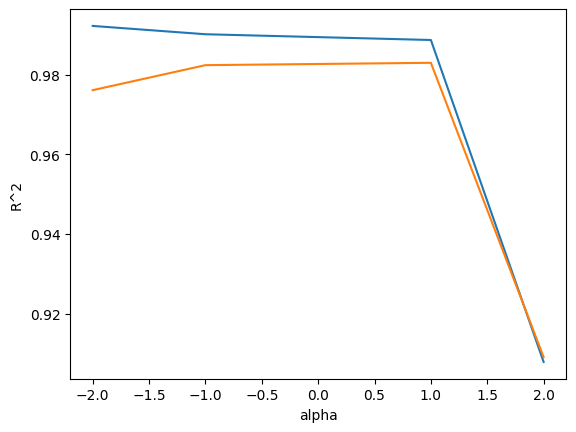

In [26]:
# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 라쏘 모델에 의한 훈련 세트와 테스트 세트 또한 규제가 낮은 왼쪽에서는 과대적합을 보여주고 있고 오른쪽으로 갈수록 점수차가 좁혀지고 있다.
# alpha가 1일때 최적이다.

In [28]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [29]:
# 릿지와 달리 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다.
# 라쏘 모델의 계수는 coef_ 속성에 저장되어 있다.
print(np.sum(lasso.coef_==0))

40
